In [1]:
import sys
import os

# Obtener el directorio actual
current_directory = os.getcwd()

# Subir dos niveles al directorio raíz, donde se encuentra la carpeta 'interpretml'
root_path = os.path.abspath(os.path.join(current_directory, '..', '..', '..'))

sys.path.append(root_path)

In [2]:
import pandas as pd
import numpy as np
import interpret
from interpret import show

In [3]:
from interpret.glassbox.nam.wrapper import NAMClassifier

c:\Users\javip\anaconda3\envs\nam\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [5]:
X_train.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [6]:
model = NAMClassifier(
            num_epochs=50,
            num_learners=5,
            metric='accuracy',
            early_stop_mode='max',
            monitor_loss=False,
            n_jobs=1,
            random_state=42
        )

model.fit(X_train, y_train)

Epoch(0):      | 0/50 [00:00<?, ?it/s]
                    Training Loss: 1.140 |
Epoch(1):           Validation Loss: 11.418 | ACCURACY: 0.179:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(1):           Validation Loss: 3.084 | ACCURACY: 0.132:   0%|          | 0/50 [00:00<?, ?it/s]
                    Training Loss: 18.293 |
Epoch(2):           Validation Loss: 3.084 | ACCURACY: 0.132:   4%|▍         | 2/50 [00:00<00:02, 17.14it/s]
                    Training Loss: 4.345 |
Epoch(3):           Validation Loss: 2.126 | ACCURACY: 0.251:   4%|▍         | 2/50 [00:00<00:02, 17.14it/s] 
                    Training Loss: 3.024 |
Epoch(4):           Validation Loss: 1.002 | ACCURACY: 0.054:   4%|▍         | 2/50 [00:00<00:02, 17.14it/s]
                    Training Loss: 1.482 |
Epoch(4):           Validation Loss: 0.816 | ACCURACY: 0.077:   4%|▍         | 2/50 [00:00<00:02, 17.14it/s]
                    Training Loss: 1.482 |
Epoch(5):         

In [7]:
model.predict(X_test).squeeze()

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [8]:
(model.predict(X_test).squeeze() == y_test).sum() / len(y_test)

0.7207792207792207

In [9]:
model.models[0]

NAM(
  (dropout_layer): Dropout(p=0.05, inplace=False)
  (feature_nns): ModuleList(
    (0): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=34)
        (1): Linear(in_features=34, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (1): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, out_features=64)
        (1): Linear(in_features=64, out_features=64, bias=True)
        (2): ReLU()
        (3): Linear(in_features=64, out_features=32, bias=True)
        (4): ReLU()
        (5): Linear(in_features=32, out_features=1, bias=False)
      )
    )
    (2): FeatureNN(
      (dropout): Dropout(p=0.1, inplace=False)
      (model): ModuleList(
        (0): LinReLU(in_features=1, 

In [10]:
model.plot(1)

(1000, 8)
(5, 1000, 1, 1)
(1000,)


{'x': array([  0.        ,   0.1981982 ,   0.3963964 ,   0.59459459,
          0.79279279,   0.99099099,   1.18918919,   1.38738739,
          1.58558559,   1.78378378,   1.98198198,   2.18018018,
          2.37837838,   2.57657658,   2.77477477,   2.97297297,
          3.17117117,   3.36936937,   3.56756757,   3.76576577,
          3.96396396,   4.16216216,   4.36036036,   4.55855856,
          4.75675676,   4.95495495,   5.15315315,   5.35135135,
          5.54954955,   5.74774775,   5.94594595,   6.14414414,
          6.34234234,   6.54054054,   6.73873874,   6.93693694,
          7.13513514,   7.33333333,   7.53153153,   7.72972973,
          7.92792793,   8.12612613,   8.32432432,   8.52252252,
          8.72072072,   8.91891892,   9.11711712,   9.31531532,
          9.51351351,   9.71171171,   9.90990991,  10.10810811,
         10.30630631,  10.5045045 ,  10.7027027 ,  10.9009009 ,
         11.0990991 ,  11.2972973 ,  11.4954955 ,  11.69369369,
         11.89189189,  12.09009009,

(1000, 8)
(5, 1000, 1, 1)
(1000,)


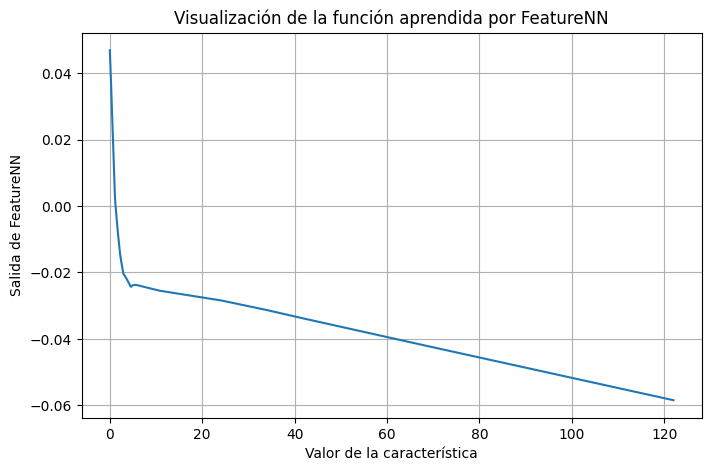

In [11]:
import matplotlib.pyplot as plt

plot = model.plot(2)

x = plot['x']
y = plot['y']
conf_int = plot['conf_int']    

plt.figure(figsize=(8, 5))
plt.plot(x, y)

plt.xlabel("Valor de la característica")
plt.ylabel("Salida de FeatureNN")
plt.title("Visualización de la función aprendida por FeatureNN")
plt.grid(True)

# Mostrar la gráfica
plt.show()

(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)


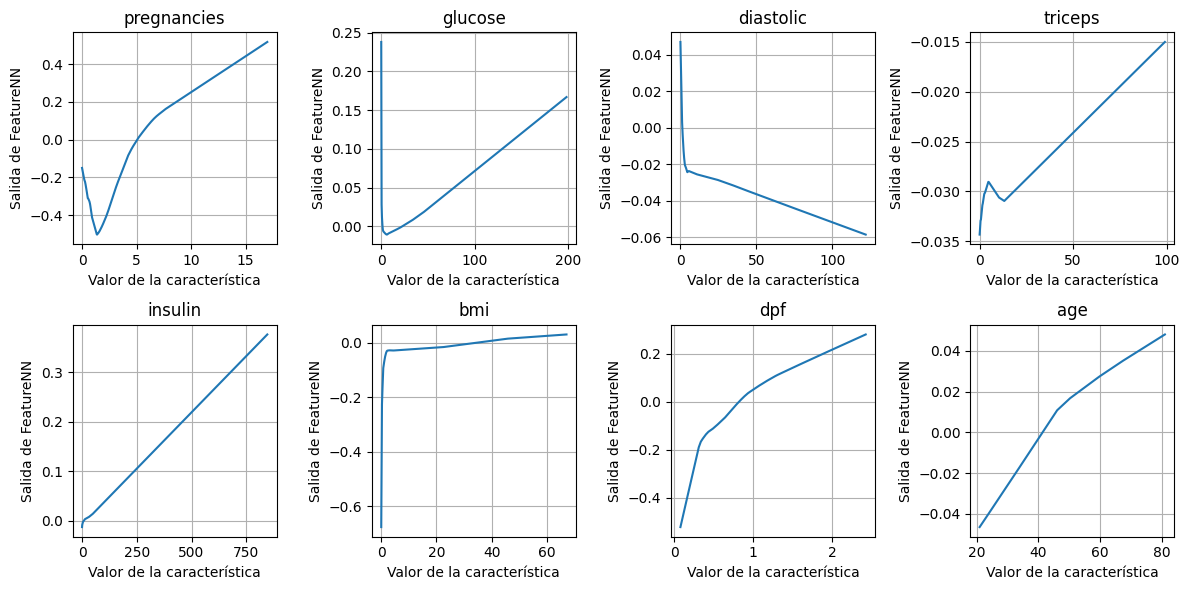

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i in range(8):
    plot = model.plot(i)
    x = plot['x']
    y = plot['y']
    conf_int = plot['conf_int']    

    ax = axes[i]
    ax.plot(x, y)

    ax.set_xlabel("Valor de la característica")
    ax.set_ylabel("Salida de FeatureNN")
    ax.set_title(X_train.columns[i])
    ax.grid(True)
    
plt.tight_layout()
plt.show()


In [13]:
X_train.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [14]:
nam_global = model.explain_global()
show(nam_global)

(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)
(1000, 8)
(5, 1000, 1, 1)
(1000,)


<!-- http://127.0.0.1:7656/2274995483976/ -->

In [15]:
len(nam_global._internal_obj['specific'])

8

In [16]:
nam_global._internal_obj['specific'][0]

{'names': array([ 0.        ,  0.01701702,  0.03403403,  0.05105105,  0.06806807,
         0.08508509,  0.1021021 ,  0.11911912,  0.13613614,  0.15315315,
         0.17017017,  0.18718719,  0.2042042 ,  0.22122122,  0.23823824,
         0.25525526,  0.27227227,  0.28928929,  0.30630631,  0.32332332,
         0.34034034,  0.35735736,  0.37437437,  0.39139139,  0.40840841,
         0.42542543,  0.44244244,  0.45945946,  0.47647648,  0.49349349,
         0.51051051,  0.52752753,  0.54454454,  0.56156156,  0.57857858,
         0.5955956 ,  0.61261261,  0.62962963,  0.64664665,  0.66366366,
         0.68068068,  0.6976977 ,  0.71471471,  0.73173173,  0.74874875,
         0.76576577,  0.78278278,  0.7997998 ,  0.81681682,  0.83383383,
         0.85085085,  0.86786787,  0.88488488,  0.9019019 ,  0.91891892,
         0.93593594,  0.95295295,  0.96996997,  0.98698699,  1.004004  ,
         1.02102102,  1.03803804,  1.05505506,  1.07207207,  1.08908909,
         1.10610611,  1.12312312,  1.14014

In [17]:
len(model.models)

5

In [18]:
X_test.shape

(154, 8)

In [19]:
X_test.iloc[[0]]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,1,199,76,43,0,42.9,1.394,22


In [20]:
import torch

In [21]:
feature_outputs = []

for m in model.models:
    _, fnns_out = m.forward(torch.tensor(X_test.values, dtype=torch.float32))
    fnns_out = fnns_out.unsqueeze(dim=1)
    feature_outputs.append(fnns_out[:, :, :, :].detach().cpu().numpy())

feature_outputs = np.stack(feature_outputs, axis=0)
print(feature_outputs.shape)
y = np.mean(feature_outputs, axis=0).squeeze()
print(y.shape)

(5, 154, 1, 1, 8)
(154, 8)


In [22]:
y.shape

(154, 8)

In [23]:
y[100]

array([-0.15004064,  0.08508094, -0.04558597, -0.02708289,  0.12128942,
        0.01259443, -0.39455682, -0.03288044], dtype=float32)

In [24]:
X_test.dtypes

pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
dtype: object

In [25]:
nam_local = model.explain_local(X_test, y_test)
show(nam_local)

<!-- http://127.0.0.1:7656/2275050029576/ -->